In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import math

## First task: draw two random curves (also randomly rotated) and try to estimate and tell them apart. 

### 1. Reparameterization of a curve 

In [3]:
x = np.linspace(-3,9, 25)
y = (x-3)**2 + 1

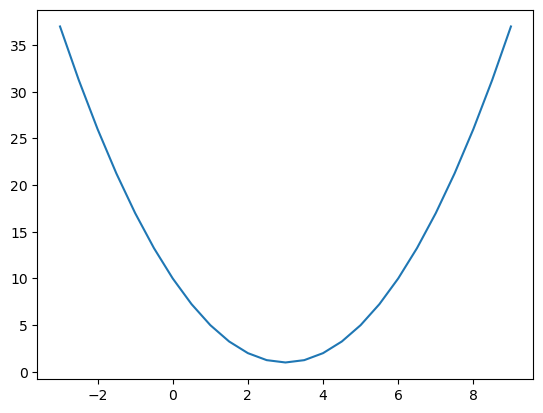

In [4]:
plt.plot(x,y)

In [5]:
theta = math.pi/2

In [6]:
t = np.linspace(-10, 10, 1000)
f_x = (t-3)**2+1
x = np.cos(theta)*t-np.sin(theta)*(f_x)
y = np.sin(theta)*t+np.cos(theta)*(f_x)

In [7]:
inds =  np.random.randint(0, 1000, 200)
sample_inds = inds[:100]
sample_inds_test = inds[100:]

In [8]:
t_samples = torch.tensor(t[sample_inds], dtype=torch.float32).unsqueeze(1)
t_samples_test = torch.tensor(t[sample_inds_test], dtype=torch.float32).unsqueeze(1)
x_samples = torch.tensor(x[sample_inds], dtype=torch.float32).unsqueeze(1)
y_samples = torch.tensor(y[sample_inds], dtype=torch.float32).unsqueeze(1)
samples = torch.stack((x_samples, y_samples), dim=1).squeeze()

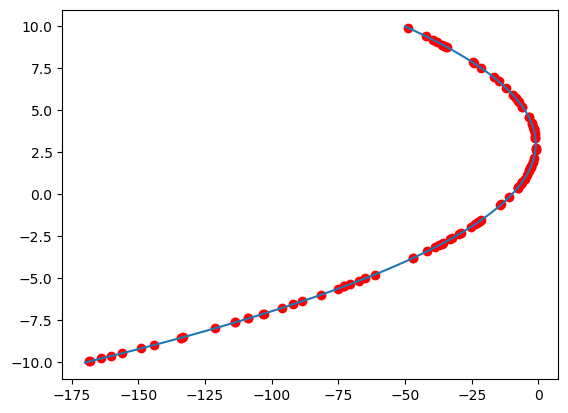

In [9]:
plt.plot(x,y)
plt.scatter(x_samples, y_samples, c='red')

In [10]:
np.random.randint(0, 1000, 200)[100:].shape

(100,)

In [11]:
print (t_samples.shape)
print (samples.shape)
print (t_samples_test.shape)

torch.Size([100, 1])
torch.Size([100, 2])
torch.Size([100, 1])


In [12]:
x_samples.shape

torch.Size([100, 1])

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 32),  # Input layer to hidden layer
            nn.ReLU(),
            nn.Linear(32, 64), # Hidden layer
            nn.ReLU(),
            nn.Linear(64, 32), # Hidden layer
            nn.ReLU(),
            nn.Linear(32, 2)   # Hidden layer to output
        )
    
    def forward(self, x):
        return self.fc(x)

In [15]:
model = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [16]:
samples.shape

torch.Size([100, 2])

In [17]:
t_samples_test.shape

torch.Size([100, 1])

In [18]:
# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(t_samples)
    loss = criterion(outputs, samples)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [50/1000], Loss: 39.4287
Epoch [100/1000], Loss: 23.8304
Epoch [150/1000], Loss: 11.1947
Epoch [200/1000], Loss: 6.8629
Epoch [250/1000], Loss: 4.3175
Epoch [300/1000], Loss: 2.5050
Epoch [350/1000], Loss: 1.3543
Epoch [400/1000], Loss: 0.7755
Epoch [450/1000], Loss: 0.4801
Epoch [500/1000], Loss: 0.3383
Epoch [550/1000], Loss: 0.1957
Epoch [600/1000], Loss: 0.1364
Epoch [650/1000], Loss: 0.0902
Epoch [700/1000], Loss: 0.0721
Epoch [750/1000], Loss: 0.0513
Epoch [800/1000], Loss: 0.0454
Epoch [850/1000], Loss: 0.0352
Epoch [900/1000], Loss: 0.1284
Epoch [950/1000], Loss: 0.0267
Epoch [1000/1000], Loss: 0.0241


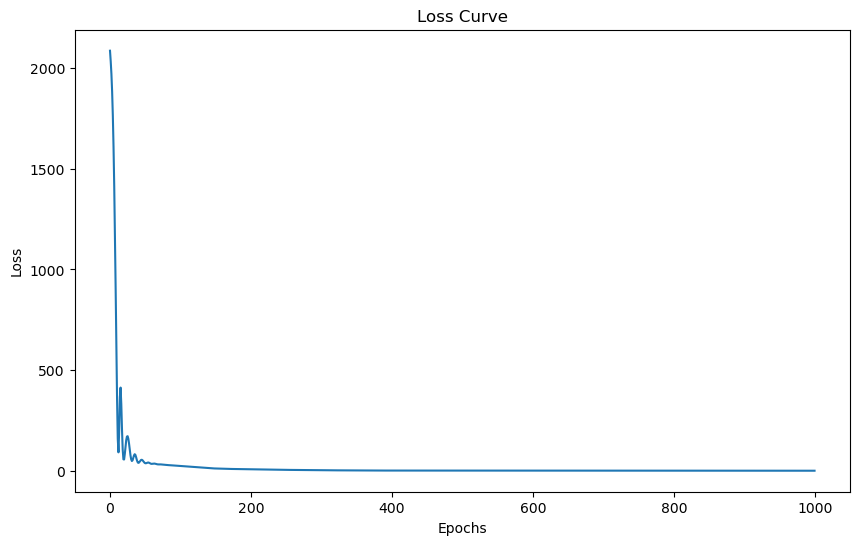

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


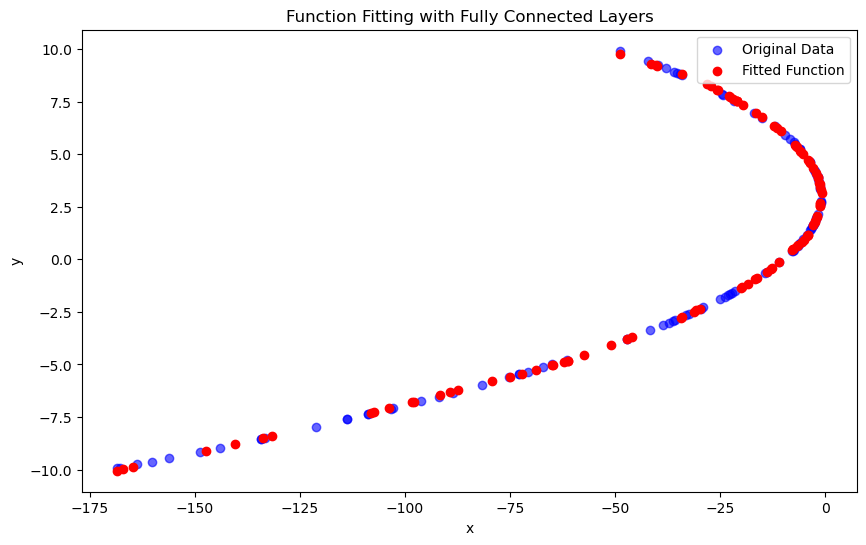

In [20]:
model.eval()
with torch.no_grad():
    xy_pred = model(t_samples_test)
    
plt.figure(figsize=(10, 6))
plt.scatter(samples[:,0], samples[:,1], label='Original Data', color='blue', alpha=0.6)
plt.scatter(xy_pred[:,0], xy_pred[:,1], label='Fitted Function', color='red')
plt.legend()
plt.title('Function Fitting with Fully Connected Layers')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
def sampler(t_0, t_n, n_sample):
    inds = np.random.randint(t_0, t_n, n_sample)
    sample_inds = inds[:100]
    samples_inds_test = inds[100:]

    

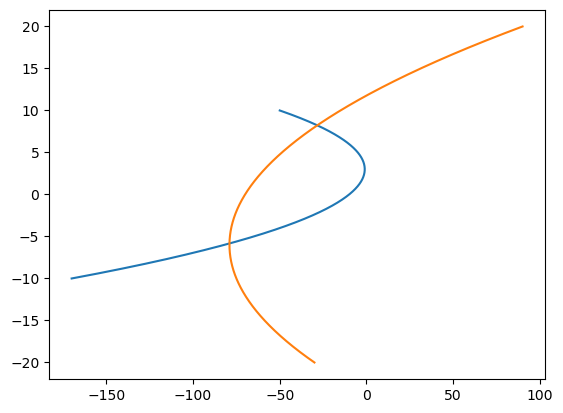

In [ ]:
t = np.linspace(0, 10, 1000)
f_x = (t-3)**2+1
x = np.cos(theta)*t-np.sin(theta)*(f_x)
y = np.sin(theta)*t+np.cos(theta)*(f_x)

plt.plot(x,y)
plt.plot(-x-80,-2*y)

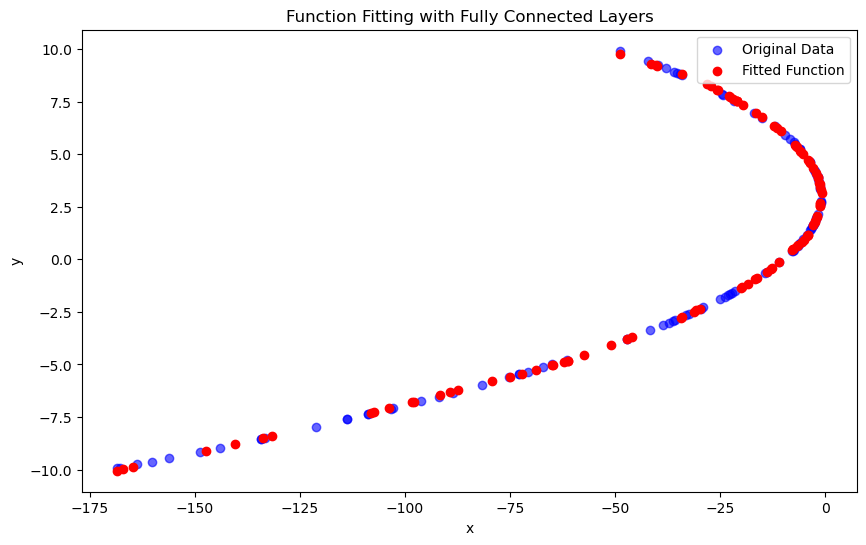

In [22]:
model.eval()
with torch.no_grad():
    xy_pred = model(t_samples_test)
    
plt.figure(figsize=(10, 6))
plt.scatter(samples[:,0], samples[:,1], label='Original Data', color='blue', alpha=0.6)
plt.scatter(xy_pred[:,0], xy_pred[:,1], label='Fitted Function', color='red')
plt.legend()
plt.title('Function Fitting with Fully Connected Layers')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define a class to fit a spline curve using PyTorch
class SplineCurveFitter(nn.Module):
    def __init__(self, num_control_points=10):
        super(SplineCurveFitter, self).__init__()
        
        # Initialize control points as trainable parameters
        self.num_control_points = num_control_points
        self.control_points = nn.Parameter(torch.randn(num_control_points, 2))  # (x, y) control points

    def forward(self, t):
        """
        Evaluate the spline at the given t values using cubic B-spline interpolation.
        :param t: tensor of values in [0, 1] to evaluate the spline curve.
        """
        # Define the knot vector for a uniform B-spline
        k = 3  # Degree of the spline (cubic)
        num_knots = self.num_control_points + k + 1
        knots = torch.cat((torch.zeros(k), torch.linspace(0, 1, num_knots - 2 * k), torch.ones(k)))
        
        # Evaluate the basis functions for each control point
        basis = self.b_spline_basis(t, knots, k)
        
        # Calculate the spline points by multiplying control points with basis functions
        curve_points = basis @ self.control_points
        return curve_points

    def b_spline_basis(self, t, knots, degree):
        """
        Recursive definition of the basis functions for B-splines.
        :param t: The parameter values to evaluate.
        :param knots: Knot vector.
        :param degree: Degree of the spline.
        :return: Matrix of basis functions evaluated at each t.
        """
        n = len(knots) - 1 - degree
        basis = torch.zeros((t.shape[0], n))
        
        # Initialize the zeroth degree
        for i in range(n):
            basis[:, i] = ((t >= knots[i]) & (t < knots[i + 1])).float()
        
        # Recursively calculate higher degree basis functions
        for d in range(1, degree + 1):
            for i in range(n - d):
                left_num = t - knots[i]
                left_den = knots[i + d] - knots[i] + 1e-10  # Avoid division by zero
                right_num = knots[i + d + 1] - t
                right_den = knots[i + d + 1] - knots[i + 1] + 1e-10
                
                left = (left_num / left_den) * basis[:, i]
                right = (right_num / right_den) * basis[:, i + 1]
                
                basis[:, i] = left + right
        
        return basis


def fit_spline_curve(x_data, y_data, num_control_points=10, num_epochs=1000, learning_rate=0.01):
    """
    Fit a spline curve to the given x and y data.
    :param x_data: x coordinates of the data points
    :param y_data: y coordinates of the data points
    :param num_control_points: Number of control points for the spline
    :param num_epochs: Number of epochs to train
    :param learning_rate: Learning rate for the optimizer
    :return: Fitted model
    """
    # Convert data to torch tensors
    x_data = torch.tensor(x_data, dtype=torch.float32)
    y_data = torch.tensor(y_data, dtype=torch.float32)
    
    # Create parameter t for evaluation (normalized to [0, 1])
    t = torch.linspace(0, 1, len(x_data))
    
    # Define the model and optimizer
    model = SplineCurveFitter(num_control_points=num_control_points)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    
    # Training loop
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        
        # Forward pass to compute spline curve points
        predicted_curve = model(t)
        
        # Calculate loss (distance between data points and spline points)
        loss = criterion(predicted_curve[:, 0], x_data) + criterion(predicted_curve[:, 1], y_data)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        # Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')
    
    return model

# Example usage
if __name__ == "__main__":
    # Generate some sample data for testing
    x_data = np.linspace(0, 1, 100)
    y_data = np.sin(2 * np.pi * x_data) + 0.01 * np.random.randn(100)  # Adding noise
    
    # Fit spline curve to data
    spline_model = fit_spline_curve(x_data, y_data, num_control_points=10, num_epochs=5000, learning_rate=0.01)
    
    # Plot the original data and fitted spline
    with torch.no_grad():
        t_eval = torch.linspace(0, 1, 200)
        fitted_curve = spline_model(t_eval)
    
    plt.scatter(x_data, y_data, color='blue', label='Data Points')
    plt.plot(fitted_curve[:, 0].numpy(), fitted_curve[:, 1].numpy(), color='red', label='Fitted Spline Curve')
    plt.legend()
    plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define a class for polynomial regression
class PolynomialRegression(nn.Module):
    def __init__(self, degree):
        super(PolynomialRegression, self).__init__()
        # The polynomial coefficients (weights) are parameters to be learned
        self.degree = degree
        self.coefficients = nn.Parameter(torch.randn(degree + 1, 1))  # (degree + 1) coefficients for polynomial terms

    def forward(self, x):
        """
        Compute polynomial output given input x.
        :param x: Input tensor of shape (n_samples,)
        :return: Predicted tensor of shape (n_samples,)
        """
        # Stack powers of x up to the degree
        X = torch.stack([x ** i for i in range(self.degree + 1)], dim=1)  # (n_samples, degree + 1)
        
        # Multiply by coefficients
        y_pred = X @ self.coefficients  # (n_samples, 1)
        return y_pred.squeeze()  # Flatten to (n_samples,)

def fit_polynomial_regression(x_data, y_data, degree=3, num_epochs=1000, learning_rate=0.01):
    """
    Fit a polynomial regression model to the given x and y data.
    :param x_data: x coordinates of the data points
    :param y_data: y coordinates of the data points
    :param degree: Degree of the polynomial
    :param num_epochs: Number of epochs to train
    :param learning_rate: Learning rate for the optimizer
    :return: Fitted model
    """
    # Convert data to torch tensors
    x_data = torch.tensor(x_data, dtype=torch.float32)
    y_data = torch.tensor(y_data, dtype=torch.float32)
    
    # Define the model and optimizer
    model = PolynomialRegression(degree=degree)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    
    # Training loop
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        
        # Forward pass to compute the model's prediction
        y_pred = model(x_data)
        
        # Calculate loss
        loss = criterion(y_pred, y_data)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        # Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')
    
    return model

# Example usage
if __name__ == "__main__":
    # Generate some sample data for testing
    x_data = np.linspace(-1, 1, 100)
    y_data = 2 * x_data ** 3 - x_data ** 2 + 0.5 * x_data + 1 + 0.1 * np.random.randn(100)  # Adding noise
    
    # Fit polynomial regression to data
    degree = 3
    poly_model = fit_polynomial_regression(x_data, y_data, degree=degree, num_epochs=1000, learning_rate=0.01)
    
    # Plot the original data and fitted polynomial
    with torch.no_grad():
        x_plot = torch.linspace(-1, 1, 200)
        y_plot = poly_model(x_plot)
    
    plt.scatter(x_data, y_data, color='blue', label='Data Points')
    plt.plot(x_plot.numpy(), y_plot.numpy(), color='red', label=f'Fitted Polynomial (degree {degree})')
    plt.legend()
    plt.show()